# Data Munging

In [170]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [162]:
raw_train_data = pd.read_csv("sales_train.csv")
category_data = pd.read_csv("items.csv").loc[:,["item_id", "item_category_id"]]
df = raw_train_data.join(category_data.set_index("item_id"), on = "item_id").drop("date", axis = 1)
category_data_dict = {x[0]:x[1] for x in category_data.itertuples(index = False)}
df = df.sample(frac=0.005, replace = True)

# One hot encoding

In [156]:
# not encoding item_id becasue possible unique set size is 22170
# for column in ["shop_id", "item_category_id"]:
#     df = pd.concat([df ,pd.get_dummies(df[column], prefix = column)], axis = 1)
#     df.drop([column], axis = 1, inplace = True)
# df.head()

,date_block_num,item_id,item_price,item_cnt_day,shop_id_0,shop_id_1,shop_id_2,shop_id_3,shop_id_4,shop_id_5,...,item_category_id_72,item_category_id_73,item_category_id_75,item_category_id_77,item_category_id_78,item_category_id_79,item_category_id_80,item_category_id_81,item_category_id_82,item_category_id_83
932853,8,2447,999.50,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128990,1,20881,649.00,1.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2378798,24,12905,199.34,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344460,2,9386,349.00,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
550470,5,6572,549.00,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Abalation//pending

In [139]:
print(len(set(category_data.item_category_id.unique())))
print(len(set(category_data.item_id.unique())))
print(len(set(raw_train_data.shop_id.unique())))

84
22170
60


In [140]:
# def getSubSampleTrainTestSet(data_set,):
sample_item_set = set(sample_train.item_id)
len(sample_item_set)
def isInTraining(item_id):
    if item_id in sample_item_set:
        return True
    return False
def getCategoryIdForItem(item_id):
#     return category_data.loc[category_data["item_id"] == item_id , "item_id"]
    return category_data_dict[item_id]



In [141]:
% matplotlib inline

In [142]:
_df = df[["shop_id", "item_cnt_day", "item_price","item_category_id", "item_id"]].loc[(df["item_price"]<1000) 
& (df["item_cnt_day"] < 5) & (df["item_price"] > 0) & (df["item_cnt_day"] > 0)]
# _df = df[['item_price','item_cnt_day','date_block_num','shop_id']].loc[(df['item_price']>0) & (df['item_price']<100000) & (df['item_cnt_day']<50)]

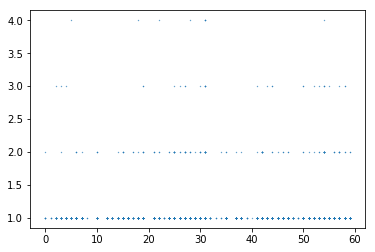

In [143]:
plt.scatter(_df["shop_id"], _df["item_cnt_day"], s=0.1)

In [144]:
pd.unique(_df["shop_id"])

array([56, 54, 35,  4, 42, 22, 41, 57, 58, 21, 49, 37, 15, 29, 16,  7, 44,
       13, 52, 59, 28,  6, 47, 25,  1, 10, 45, 39, 30, 19, 34, 31,  5, 43,
       55, 26, 51, 50, 27,  3, 53, 24, 18,  2, 38, 46, 48, 17, 12, 14, 32,
        8,  0, 23, 40, 33])

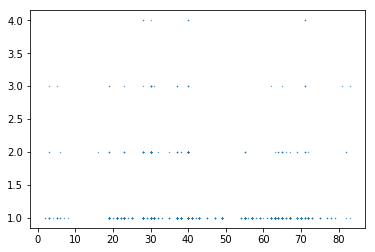

In [145]:
plt.scatter(_df["item_category_id"], _df["item_cnt_day"], s=0.1)

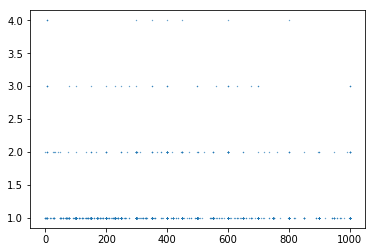

In [146]:
plt.scatter(_df["item_price"], _df["item_cnt_day"], s=0.1)

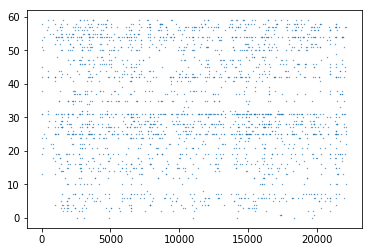

In [147]:
plt.scatter(_df["item_id"], _df["shop_id"], s=0.1)

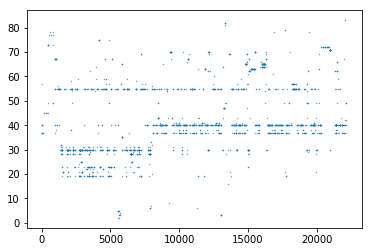

In [148]:
plt.scatter(_df["item_id"], _df["item_category_id"], s=0.1)

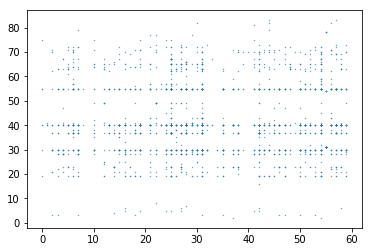

In [149]:
plt.scatter(_df["shop_id"], _df["item_category_id"], s=0.1)

In [150]:
_df.corr()

,shop_id,item_cnt_day,item_price,item_category_id,item_id
shop_id,1.000000,0.011627,-0.051838,0.017928,-0.001422
item_cnt_day,0.011627,1.000000,0.027962,-0.028431,-0.008004
item_price,-0.051838,0.027962,1.000000,-0.251972,-0.246398
item_category_id,0.017928,-0.028431,-0.251972,1.000000,0.329927
item_id,-0.001422,-0.008004,-0.246398,0.329927,1.000000


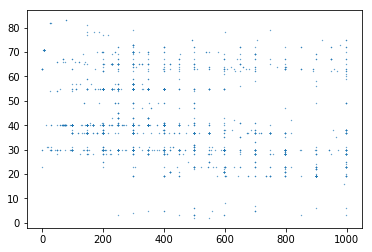

In [151]:
plt.scatter(_df["item_price"], _df["item_category_id"], s=0.1)

In [152]:
# from mpl_toolkits.mplot3d import Axes3D
# figure = plt.figure()
# ax = figure.add_subplot(111, projection="3d")
# ax.scatter(_df["item_price"], _df["item_category_id"], _df["item_id"])
len(pd.unique(df["item_price"].astype(int)))

396

In [153]:
len(pd.unique(df["item_category_id"]))

64

# Model Fitting

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
932853,8,56,2447,999.50,1.0,23
128990,1,54,20881,649.00,1.0,72
2378798,24,35,12905,199.34,1.0,37
344460,2,4,9386,349.00,1.0,67
550470,5,42,6572,549.00,1.0,25


In [166]:
raw_train_data = pd.read_csv("sales_train.csv")
category_data = pd.read_csv("items.csv").loc[:,["item_id", "item_category_id"]]
df = raw_train_data.join(category_data.set_index("item_id"), on = "item_id").drop("date", axis = 1)
category_data_dict = {x[0]:x[1] for x in category_data.itertuples(index = False)}
df = df.sample(frac=0.001, replace = True)

for column in ["shop_id", "item_category_id"]:
    df = pd.concat([df ,pd.get_dummies(df[column], prefix = column)], axis = 1)
    df.drop([column], axis = 1, inplace = True)
df.drop(["item_id"], axis = 1, inplace = True)

In [171]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [172]:
lm = linear_model.LinearRegression()
lm.fit(df_train[""])

291152

In [173]:
df_test.size

72912